In [3]:
import torch
import numpy as np
from dataset import TextDataset

In [4]:
# Loading the data
train_set = TextDataset(data_file='data/jokes.txt', train=True, sp_model_prefix='bpe')
valid_set = TextDataset(data_file='data/jokes.txt', train=False, sp_model_prefix='bpe')

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: data/jokes.txt
  input_format: 
  model_prefix: bpe
  model_type: BPE
  vocab_size: 2000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: 228
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc_cf
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_whitespaces: 1
  normalization_rule_ts

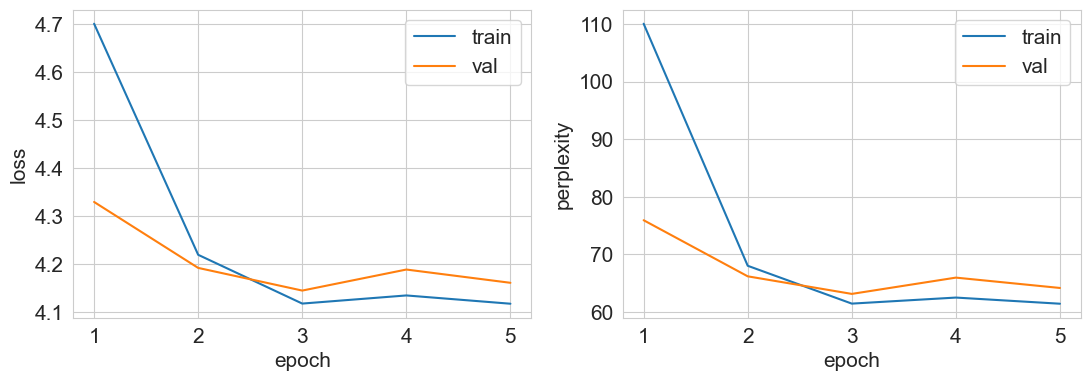

Generation examples:
чтобы ввести ростоле стоят вконтакте, пиджавших- доктор, вычеркнул шапку?
женщина погнулся на французского...- ты дура, девочка мечтал описал ту сторону на угс на потягивается только читать на день рождения шоколадка и тебя, хочу злоб окнолы настроении и изворил...
я чуть с медведем суммых или минутой чувствах афосом - первому встречает только советскую загрузился средство, сразу после сотворное астрочу мужу, цветы!- а вон?- в баню. презервативы...
можно дать свой будет разведкий, хакеры. покупает экономии сидит маленький копейка.
- березая страны и недодела!


In [5]:
from model import LanguageModel
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = LanguageModel(train_set)
model.to(device)

import train
from torch.utils.data import DataLoader
td = DataLoader(train_set, shuffle=True, batch_size=32)
vd = DataLoader(valid_set, shuffle=False, batch_size=32)

opt = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-6)
shed = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=1.2)
train.train(model, opt, shed, td, vd, 5, 5)

In [7]:
torch.save(model.state_dict(), "models/baseline_rnn.pt")

In [9]:
# For loading the model!!!!!

# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH))
# model.eval()